In [82]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import pandas as pd 
from os import path
from numpy.linalg import norm
from cmaps import *
from cycler import cycler

In [83]:
stephen_dir = '../../data/stephen_data/'
lambda_p1 = np.genfromtxt(path.join(stephen_dir, 'su2_lambda_p=1.txt'), delimiter='\t')
lambda_p2 = np.genfromtxt(path.join(stephen_dir, 'su2_lambda_p=2.txt'), delimiter='\t')
lambda_p3 = np.genfromtxt(path.join(stephen_dir, 'su2_lambda_p=3.txt'), delimiter='\t')

lps = [lambda_p1, lambda_p2, lambda_p3]
# Drop values for no truncation

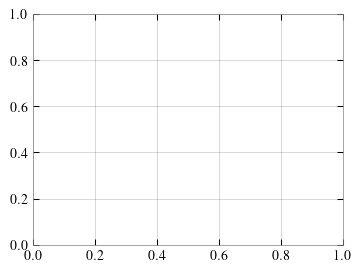

In [84]:
fig, ax = plt.subplots(figsize=(4, 3))

In [85]:
# Uncomment for old color scheme below 
# c = cycler(color=['lightcoral', 'cornflowerblue', 'mediumseagreen', 'gold'])

# https://cran.r-project.org/web/packages/khroma/vignettes/tol.html 
# colorblind-friendly scheme by Paul Tol
c = cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])

ax.set_prop_cycle(c)

In [86]:
j_scales = [22, 14, 120]
power = [1, 2, 3]
for lp, j_scale, p in zip(lps, j_scales, power):
    ax.scatter(lp[:, 0], lp[:, 1], alpha=0.7, label=f'$p={p}$')

    j_cont = np.linspace(np.min(lp[:, 0]), np.max(lp[:, 0]))
    ax.plot(j_cont, j_scale * np.power(j_cont, 2), alpha=0.5)

In [87]:
loglog = False
if loglog:
	ax.set_xlim(0.01, 0.32)
	ax.set_ylim(0.01, 4)
	ax.set_yscale('log')
	ax.set_xscale('log')
else:
	ax.set_xlim(-0.05/3, 0.32)
	ax.set_ylim(-0.15, 4)


In [88]:
ax.set_xlabel('$J^{(p)}/J_\mathrm{max}$')
ax.set_ylabel('$\lambda_0$')

Text(4.444444444444448, 0.5, '$\\lambda_0$')

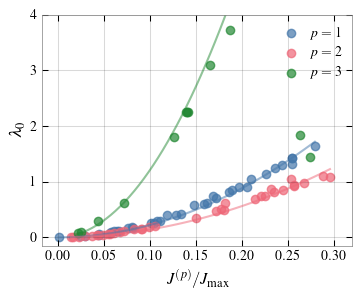

In [89]:
ax.legend(frameon=False)
fig

In [90]:
fig.savefig('../drafts/su2_quadratic_fit.pdf')
fig.savefig('../drafts/su2_quadratic_fit.png')
fig.get_size_inches()*fig.dpi

array([400., 300.])